In [1]:
import matplotlib.pyplot as plt
import statistics
import io
from contextlib import redirect_stdout

In [2]:
## Run three versions of VQEs.
%run Main0_VQE_vanillaY.ipynb            # Vanilla VQE (VQE-V)
%run Main1_VQE_adaptY_taperingY.ipynb    # Adapt-VQE with qubit tapering (VQE-A-T)
%run Main2_VQE_adaptY_activeSpaceY.ipynb # Adapt-VQE with selected active space (VQE-A-S)


<Info of vanilla VQE>
Number of qubits needed: 14
Number of Pauli strings: 666
Completed iteration: 5
Energy: -15.586670350513396 Ha
Step Time: 2.8180580139160156 s
----------------
Completed iteration: 10
Energy: -15.58869846876978 Ha
Step Time: 2.8660924434661865 s
----------------
Completed iteration: 15
Energy: -15.590805117263837 Ha
Step Time: 2.856933116912842 s
----------------
Completed iteration: 20
Energy: -15.593202569345982 Ha
Step Time: 2.7438180446624756 s
----------------
Completed iteration: 25
Energy: -15.593906008422142 Ha
Step Time: 2.7888855934143066 s
----------------
Completed iteration: 30
Energy: -15.594068423787363 Ha
Step Time: 2.7312135696411133 s
----------------
Completed iteration: 35
Energy: -15.594489442282573 Ha
Step Time: 2.8143465518951416 s
----------------
Completed iteration: 40
Energy: -15.594547245829034 Ha
Step Time: 2.795969247817993 s
----------------
Completed iteration: 45
Energy: -15.594646751809245 Ha
Step Time: 2.820343494415283 s
------

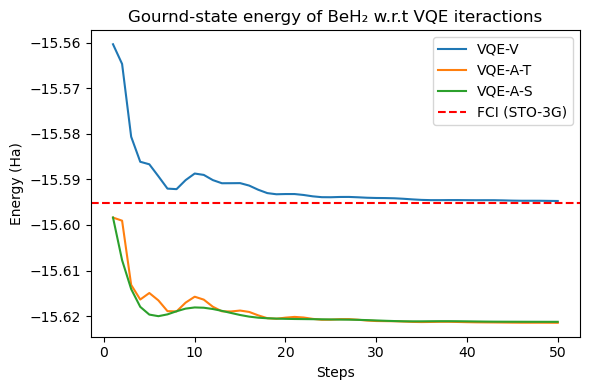

In [3]:
## Plotting the VQE energy w.r.t iterations.
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1,50+1), energies_vanilla, label="VQE-V")
plt.plot(np.arange(1,50+1), adapt_energies_tapered, label="VQE-A-T")
plt.plot(np.arange(1,50+1), adapt_energies_active, label="VQE-A-S")
plt.axhline(y = -15.595176868923, # Calculated by PySCF 2.1.1
            color = 'r', linestyle = 'dashed', label="FCI (STO-3G)")
plt.xlabel("Steps")
plt.ylabel("Energy (Ha)")
plt.title('Gournd-state energy of BeH₂ w.r.t VQE iteractions')
plt.legend()
plt.tight_layout()
plt.savefig("./plots/energy.png")

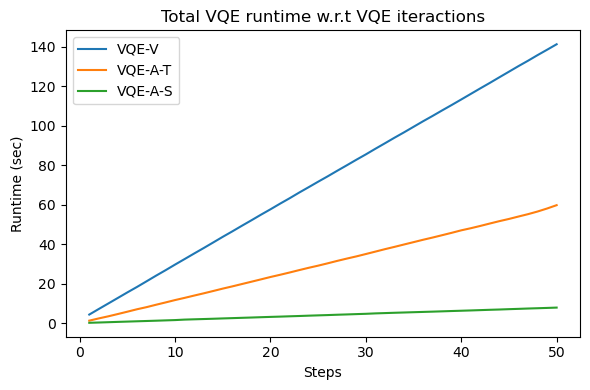

In [4]:
## Plotting the VQE runtime w.r.t iterations.
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1,50+1), runtime_vanilla, label="VQE-V")
plt.plot(np.arange(1,50+1), adapt_runtime_tapered, label="VQE-A-T")
plt.plot(np.arange(1,50+1), adapt_runtime_active, label="VQE-A-S")
plt.xlabel("Steps")
plt.ylabel("Runtime (sec)")
plt.title('Total VQE runtime w.r.t VQE iteractions')
plt.legend()
plt.tight_layout()
plt.savefig("./plots/runtime.png")

In [5]:
E0_VQE_V = energies_vanilla[49]
E0_VQE_A_T = adapt_energies_tapered[49]
E0_VQE_A_S = adapt_energies_active[49]
print("E0_VQE_V =", E0_VQE_V, "Ha")
print("E0_VQE_A_T =", E0_VQE_A_T, "Ha")
print("E0_VQE_A_S =", E0_VQE_A_S, "Ha")

E0_VQE_V = -15.594727310860792 Ha
E0_VQE_A_T = -15.621475490031488 Ha
E0_VQE_A_S = -15.621261409466257 Ha


In [6]:
n_repeat = 25
ts_VQE_V = []
ts_VQE_A_T = []
ts_VQE_A_S = []
io_trap = io.StringIO()
with redirect_stdout(io_trap):
    for i in range(n_repeat):
        %run Main0_VQE_vanillaY.ipynb
        ts_VQE_V.append(runtime_vanilla[49])
        %run Main1_VQE_adaptY_taperingY.ipynb
        ts_VQE_A_T.append(adapt_runtime_tapered[49])
        %run Main2_VQE_adaptY_activeSpaceY.ipynb
        ts_VQE_A_S.append(adapt_runtime_active[49])

In [7]:
t_mean_VQE_A_S = statistics.mean(ts_VQE_A_S)
rt_std_VQE_A_S = statistics.stdev(ts_VQE_A_S) / t_mean_VQE_A_S

rt_mean_VQE_V = statistics.mean(ts_VQE_V) / t_mean_VQE_A_S
rt_std_VQE_V = statistics.stdev(ts_VQE_V) / t_mean_VQE_A_S

rt_mean_VQE_A_T = statistics.mean(ts_VQE_A_T) / t_mean_VQE_A_S
rt_std_VQE_A_T = statistics.stdev(ts_VQE_A_T) / t_mean_VQE_A_S

print("mrt_VQE_V =", rt_mean_VQE_V, "±", rt_std_VQE_V)
print("mrt_VQE_A_T =", rt_mean_VQE_A_T, "±", rt_std_VQE_A_T)
print("mrt_VQE_A_S =", 1.0, "±", rt_std_VQE_A_S)

mrt_VQE_V = 14.303599966976886 ± 1.2554574524025377
mrt_VQE_A_T = 6.8971626029509565 ± 1.009329161721122
mrt_VQE_A_S = 1.0 ± 0.39585371825337057
